In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import sklearn.metrics as sklm
import math
import scipy.stats as ss

In [3]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)

In [4]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


**T** : Average Temperature (°C)      
**TM** : Maximum Temperature (°C)      
**Tm** : Minimum Temperature (°C)      
**SLP**: Atmospheric pressure at sea level (hPa)     
**H**: Average relative humidity (%)    
**VV**: Average visibility (Km)     
**V**: Average wind speed (Km/h)     
**VM**: Maximum sustained wind speed (Km/h)     
**PM 2.5**: Air quality Index    

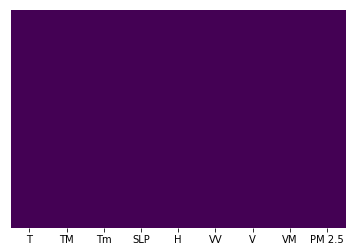

In [6]:
# Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')   # cbar -> is colour bar, cmap -> is colour map 

In [7]:
df.dropna()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
5,16.0,25.2,10.0,1013.2,79.0,0.6,4.8,11.1,285.225000
6,13.4,21.0,9.2,1015.1,87.0,0.5,1.5,7.6,236.825000
7,14.3,22.6,6.6,1016.3,76.0,0.8,0.4,3.5,276.908333
8,12.7,18.9,7.3,1021.2,76.0,1.8,6.1,16.5,108.000000
9,11.9,18.9,6.3,1020.1,76.0,1.1,8.3,20.6,107.625000


In [8]:
X = df.iloc[:,:-1] # independent features
y = df.iloc[:,-1] ## dependent features

In [9]:
## check for null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [10]:
y = y.fillna(0)

In [11]:
y.isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


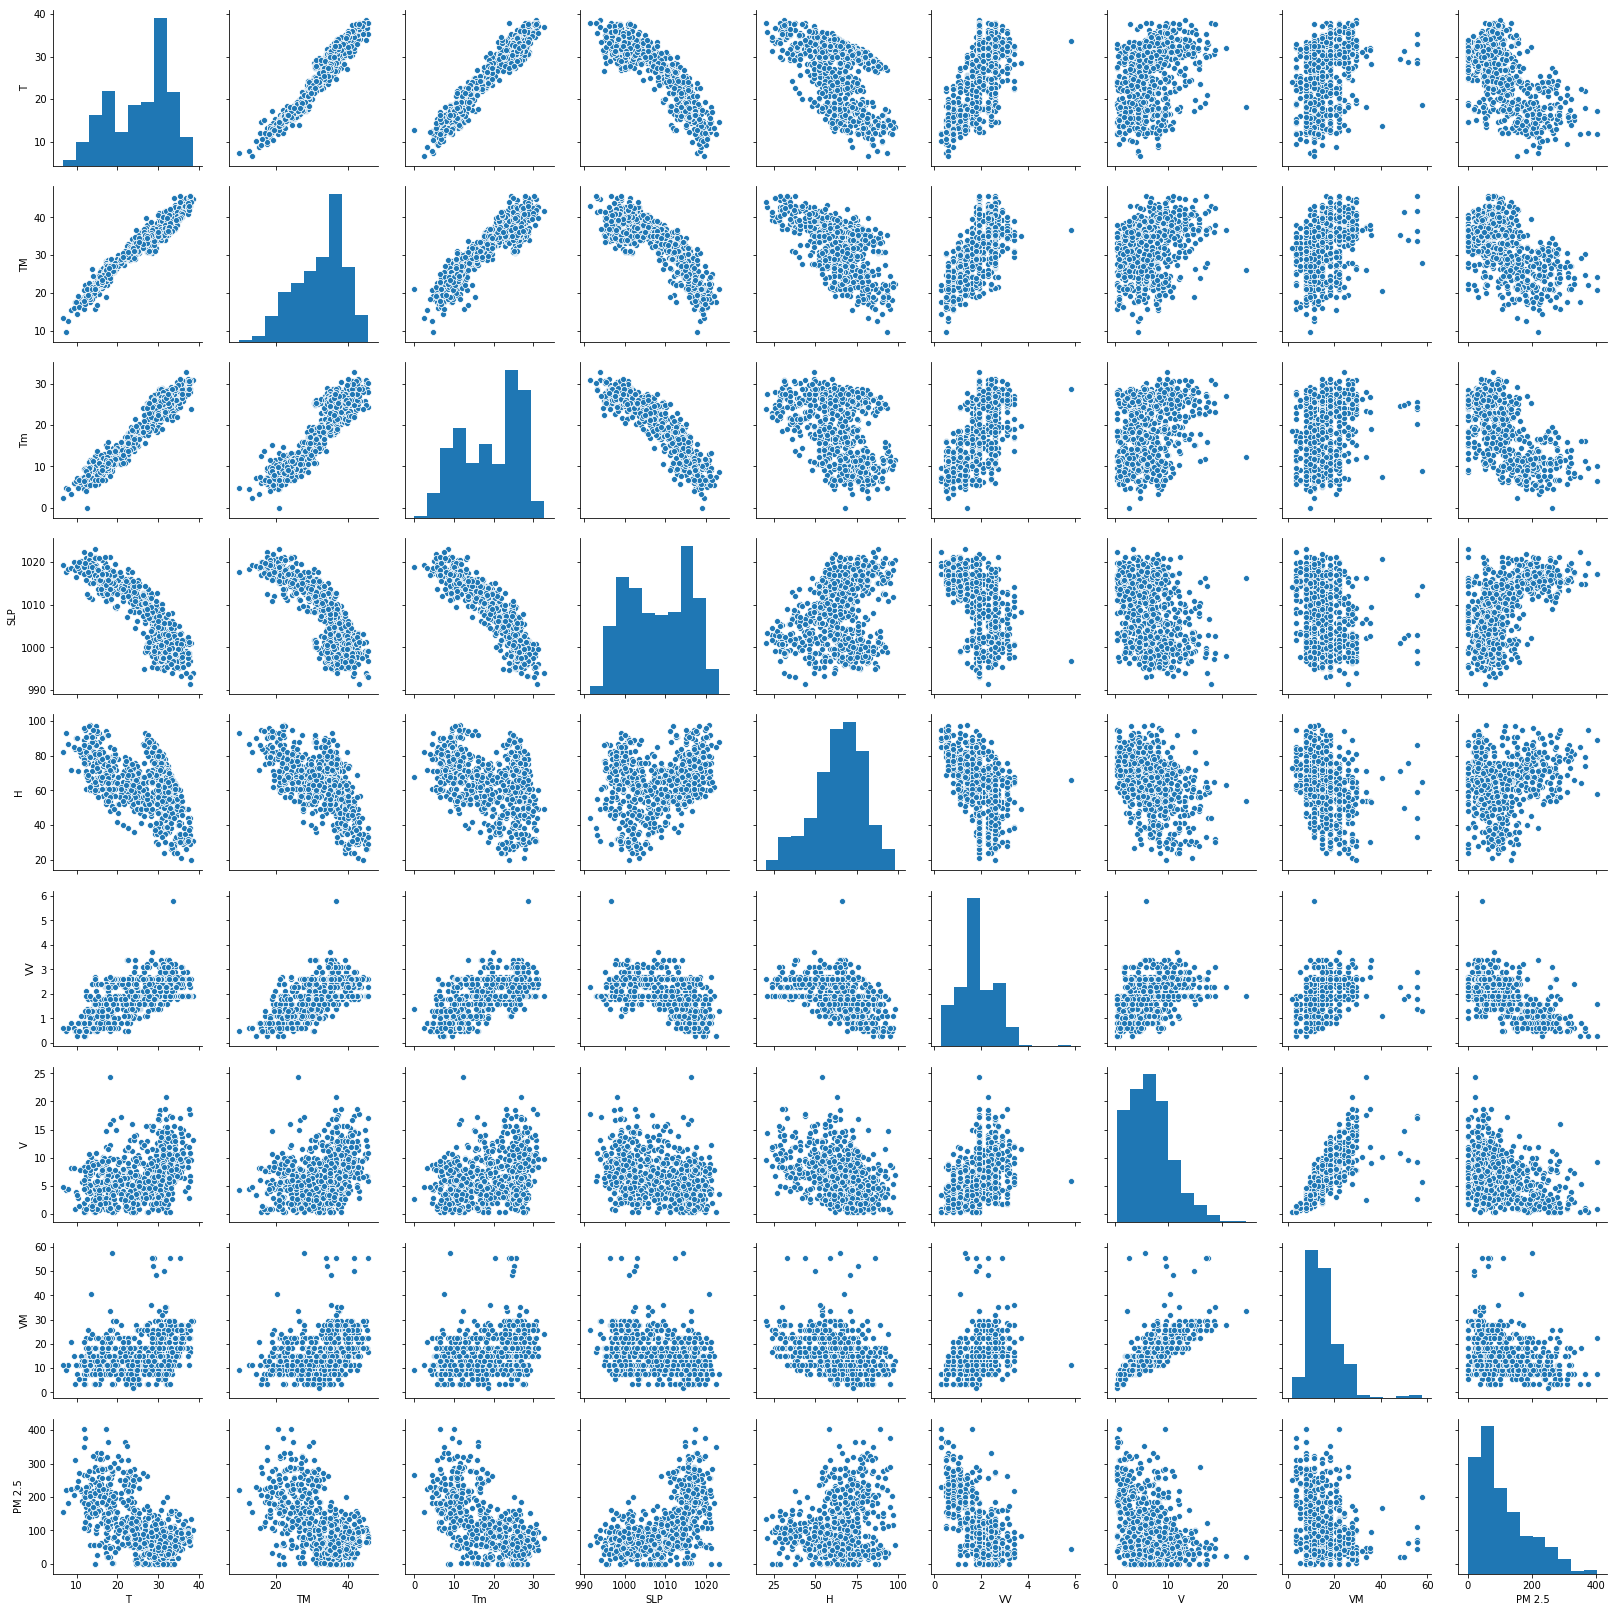

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967323,0.958872,-0.884778,-0.520629,0.622441,0.326463,0.287869,-0.628336
TM,0.967323,1.000000,0.896628,-0.829935,-0.601433,0.598028,0.320478,0.300257,-0.569381
Tm,0.958872,0.896628,1.000000,-0.909582,-0.317057,0.560399,0.313298,0.260067,-0.669059
SLP,-0.884778,-0.829935,-0.909582,1.000000,0.277007,-0.491837,-0.346481,-0.300552,0.615615
H,-0.520629,-0.601433,-0.317057,0.277007,1.000000,-0.475249,-0.399293,-0.371552,0.174658
VV,0.622441,0.598028,0.560399,-0.491837,-0.475249,1.000000,0.403044,0.347714,-0.628621
V,0.326463,0.320478,0.313298,-0.346481,-0.399293,0.403044,1.000000,0.760858,-0.354799
VM,0.287869,0.300257,0.260067,-0.300552,-0.371552,0.347714,0.760858,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


### Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.  
                      
Correlation can be positive (increase in one value of feature increase the value of the target variable) or negetive (increase in one value of feature decreases the value of the target variable).
                        
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

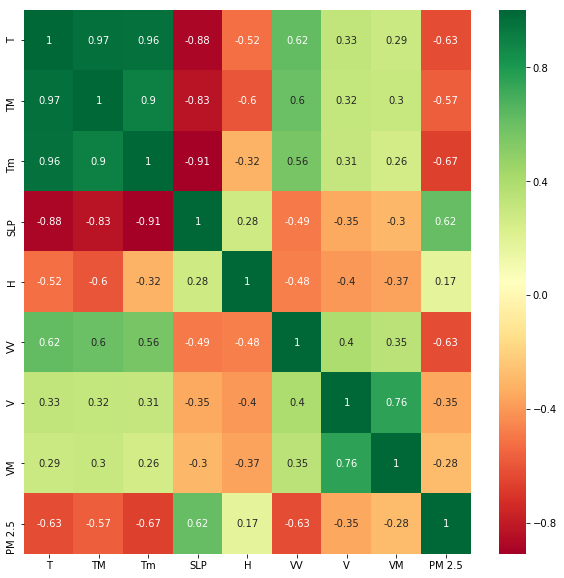

In [14]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
# Plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance   

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.      

Feature importance gives you a score for each feature of your data, the higher the score more important or relavant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regression, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
print(model.feature_importances_)

[0.18450305 0.14561817 0.13707632 0.08452737 0.08130021 0.27360527
 0.05571281 0.03765681]


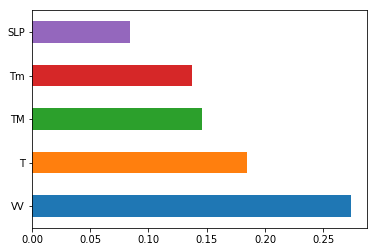

In [18]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


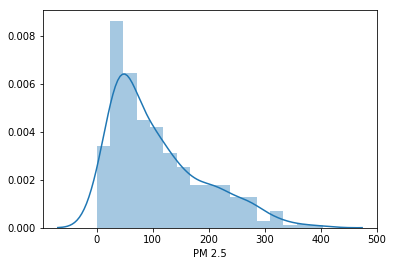

In [19]:
sns.distplot(y)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) # train_test_split splits arrays or
# matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior,
# so, random_state = 0 means split will be always the same it doesn't matter what the random_state value is but it contains any number  

In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
X_train[:5,:]

(511, 8)


array([[-0.49779107, -0.28696006, -0.43051916,  0.89647213,  0.9225598 ,
        -1.93770769, -1.39192943, -1.10256626],
       [-1.80372393, -1.55367451, -1.72822915,  1.54007431,  0.35251378,
         0.02858462,  0.02727717, -0.09881464],
       [-1.05553323, -0.86273935, -1.11282029,  0.82943024,  0.22583689,
        -1.23546044, -0.91041291, -0.61463145],
       [-1.00111936, -1.02107866, -0.97903576,  0.84283862,  0.79588291,
        -1.79725824, -0.4035534 , -0.61463145],
       [ 0.48165858,  0.37518613,  1.05448919, -0.63208304,  0.73254446,
         0.02858462, -0.5049253 , -0.61463145]])

### Compairing Linear, Ridge and Lasso Regression

In [22]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Mean Square Error      = 2953.46451184494
Root Mean Square Error = 54.34578651418102
Mean Absolute Error    = 39.33761835557686
Median Absolute Error  = 29.61577616866414
R^2                    = 0.5300541294481937


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


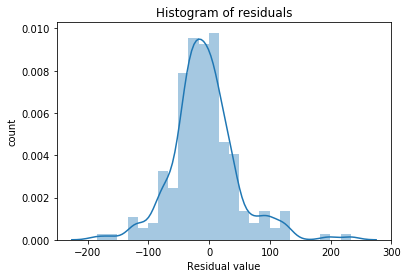

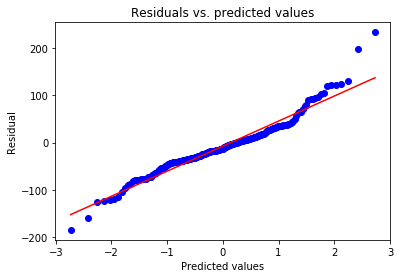

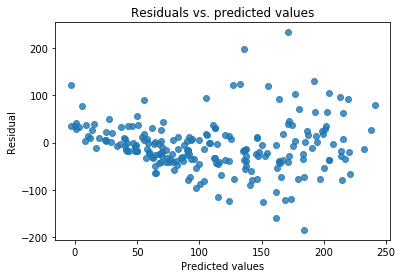

In [23]:
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    #print(y_test)
    #print(y_score)
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
  

y_test = np.ravel(y_test)
y_score = regressor.predict(X_test) 
print_metrics(y_test, y_score) 
hist_resids(y_test, y_score)  
resid_qq(y_test, y_score) 
resid_plot(y_test, y_score) 

The above graph shows that model seems to do a good job for small AQI index values like from above 0 to 100 predicting good after that somewhat disperse

[2945.7622230605866, 2940.6395177596823, 2937.0171604373822, 2934.358283795608, 2932.365876743718, 2930.8613076337992, 2929.7296820680313, 2928.8929530154273, 2928.295677838984, 2927.896993768668, 2927.6658521456466, 2927.5780560455296, 2927.614344210619, 2927.75910778776, 2927.999504126049, 2928.3248280149473, 2928.726054806075, 2929.195501355492, 2929.7265696609193, 2930.313549788841, 2930.9514661335606, 2931.635955897381, 2932.363171906622, 2933.129704068618, 2933.932515290678, 2934.768888749183, 2935.636384160505, 2936.532801259774, 2937.4561491015547, 2938.4046201005863, 2939.376567960106, 2940.3704888101415, 2941.385005012744, 2942.4188511957987, 2943.470862159058, 2944.5399623608714, 2945.6251567456793, 2946.725522713711, 2947.8402030677385, 2948.968399798778, 2950.1093685948485, 2951.262413974968, 2952.426884965623, 2953.602171249332, 2954.7876997252724, 2955.982931430583, 2957.1873587782243, 2958.4005030733665, 2959.621912275479, 2960.851158977652, 2962.087838578436, 2963.3315

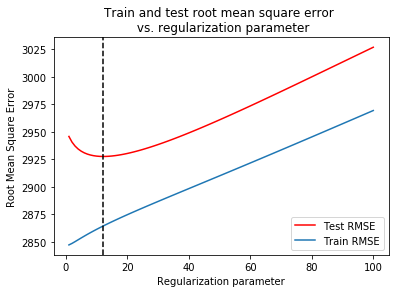

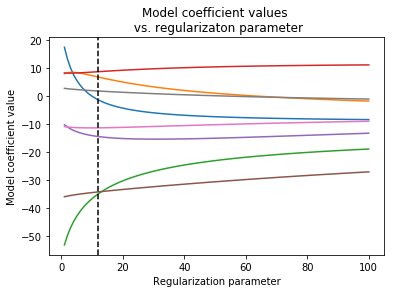

(12, 2927.5780560455296)


In [24]:
def plot_regularization(l, train_RMSE, test_RMSE, coefs, min_idx, title):   
    plt.plot(l, test_RMSE, color = 'red', label = 'Test RMSE')
    plt.plot(l, train_RMSE, label = 'Train RMSE')    
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l, coefs)
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.title('Model coefficient values \n vs. regularizaton parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Model coefficient value')
    plt.show()

def test_regularization_l2(x_train, y_train, x_test, y_test, l2):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l2:
        lin_mod = linear_model.Ridge(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
        
    print(test_RMSE)
    print(coefs)
    min_idx = np.argmin(test_RMSE)
    print(min_idx)
    min_l2 = l2[min_idx]
    print(min_l2)
    min_RMSE = test_RMSE[min_idx]
    print(min_RMSE)
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_l2, title)
    return min_l2, min_RMSE
     
l2 = [x for x in range(1,101)]
out_l2 = test_regularization_l2(X_train, y_train, X_test, y_test, l2)
print(out_l2)

Mean Square Error      = 2927.5780560455296
Root Mean Square Error = 54.107098019072595
Mean Absolute Error    = 39.19348987388752
Median Absolute Error  = 29.53303345706246
R^2                    = 0.5341730998835471


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


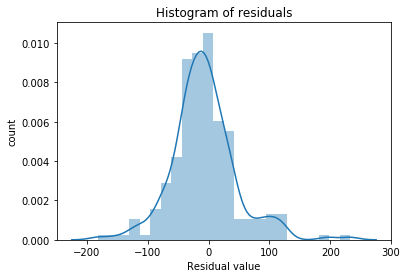

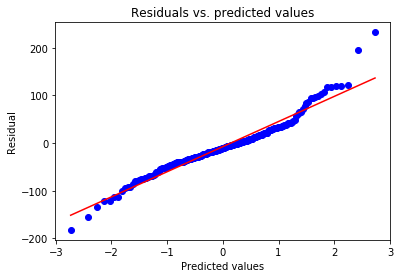

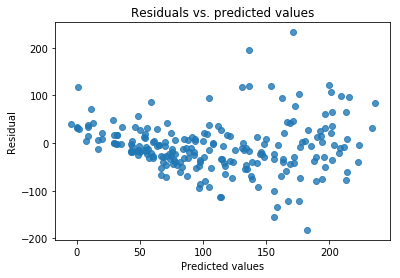

In [25]:
lin_mod_l2 = linear_model.Ridge(alpha = out_l2[0])
lin_mod_l2.fit(X_train, y_train)
y_score_l2 = lin_mod_l2.predict(X_test)

print_metrics(y_test, y_score_l2)
hist_resids(y_test, y_score_l2)  
resid_qq(y_test, y_score_l2) 
resid_plot(y_test, y_score_l2) 

Compare the error metrics achieved to those of the un-regularized model. The error metrics for the regularized model are somewhat better. This fact, indicates that the regularized model generalizes better than the unregularized model. Notice also that the residuals are a bit closer to Normally distributed than for the unregularized model. 

In [30]:
import pickle
# open a file where you want to store the data
file = open('Ridge_regression_model.pkl','wb')

# dump information to the file
pickle.dump(lin_mod_l2,file)

### Lasso regression

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


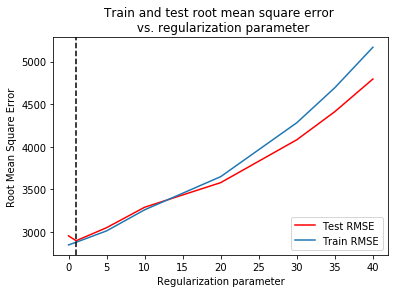

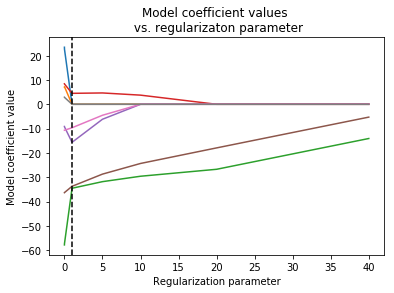

(1, 2895.707357692674)


In [26]:
def test_regularization_l1(x_train, y_train, x_test, y_test, l1):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l1:
        lin_mod = linear_model.Lasso(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l1 = l1[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l1, train_RMSE, test_RMSE, coefs, min_l1, title)
    return min_l1, min_RMSE
    
l1 = [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]
out_l1 = test_regularization_l1(X_train, y_train, X_test, y_test, l1)
print(out_l1)

Mean Square Error      = 2895.707357692674
Root Mean Square Error = 53.81177712817775
Mean Absolute Error    = 38.87577151661264
Median Absolute Error  = 29.36135673648149
R^2                    = 0.5392442639427254


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


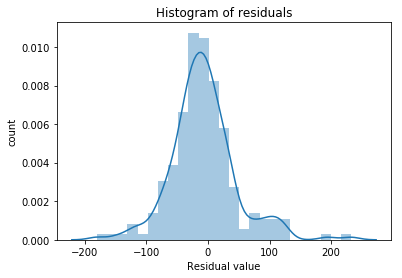

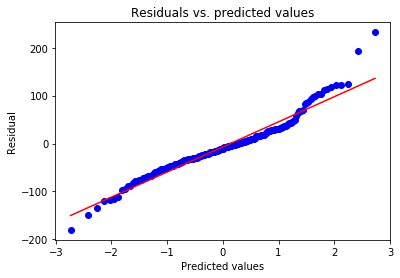

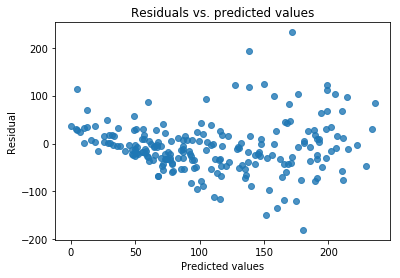

In [27]:
lin_mod_l1 = linear_model.Lasso(alpha = out_l1[0])
lin_mod_l1.fit(X_train, y_train)
y_score_l1 = lin_mod_l1.predict(X_test)

print_metrics(y_test, y_score_l1) 
hist_resids(y_test, y_score_l1)  
resid_qq(y_test, y_score_l1) 
resid_plot(y_test, y_score_l1) 

Compare the error metrics achieved to those of the un-regularized model and regularized model using Ridge regression. The error metrics for the Lasso regularized model are bit much similar with Ridge regressor. Residuals are also much more similar to Ridge regression.

So, That's all about Ridge and Lasso regression by compairing the both of the model with the unregularized model and we got to know how to generalize the mode and implementation of it.


In [31]:
import pickle
# open a file where you want to store the data
file = open('Lasso_regression_model.pkl','wb')

# dump information to the file
pickle.dump(lin_mod_l1,file)

### Summary

In this lab you have explored the basics of regularization. Regularization can prevent machine learning models from being overfit. Regularization is required to help machine learning models generalize when placed in production. Selection of regularization strength involves consideration of the bias-variance trade-off. 

We had look how the performance differed when used regularization using L2 or L1 norm. when we see the compairison on L2 and L1, L1 is bit better than L1 this is because L1 regularization can drive model coefficients to zero so it removes some of the model parameter dirictly.
so higher regularized model build than L2 we can say it. 